In [2]:
from typing import TypedDict, Annotated
from pydantic import BaseModel 
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.graph import add_messages # prebuilt reducer function to append
from langgraph.checkpoint.memory import  InMemorySaver #implement persistence in ram

load_dotenv()
llm=ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

In [3]:
class ChatState(TypedDict):
    topic:str
    joke:str
    explaination:str

In [5]:
def generate_joke(state:ChatState):
    prompt=f"generate a joke on the topic {state["topic"]}"
    response=llm.invoke(prompt).content

    return {'joke':response}
  
def generate_explaination(state:ChatState):
    prompt=f"write an explaination for the joke:\n {state["joke"]}"
    response=llm.invoke(prompt).content

    return {'explaination':response}
  

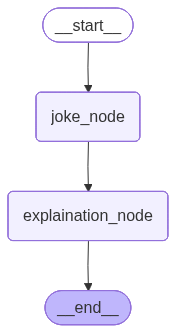

In [7]:
graph=StateGraph(ChatState)

#add nodes
graph.add_node('joke_node',generate_joke)
graph.add_node('explaination_node',generate_explaination)
#add edges
graph.add_edge(START,'joke_node')
graph.add_edge('joke_node','explaination_node')
graph.add_edge("explaination_node",END)

graph.compile()

In [9]:
checkpointer=InMemorySaver()
workflow=graph.compile(checkpointer=checkpointer)

thread_id='1' # a thread is one interaction with the chatbot, like a session id
config = {
    "configurable": {
        "thread_id": thread_id
    }
}


In [10]:
workflow.invoke(
    {
        'topic':'pizza'
    },
    config=config
)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to therapy? \n\nBecause it had too many *crust issues*!',
 'explaination': 'This joke plays on a pun, using the word "crust" in two different ways:\n\n*   **Literal:** Pizza has a crust, the outer edge of the pizza.\n*   **Figurative:** "Crust issues" sounds like "trust issues," which is a common problem people discuss in therapy.\n\nThe joke\'s humor comes from the unexpected connection between the literal pizza crust and the emotional concept of trust. The absurdity of a pizza needing therapy for something like "crust issues" is what makes it funny.'}

In [11]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy? \n\nBecause it had too many *crust issues*!', 'explaination': 'This joke plays on a pun, using the word "crust" in two different ways:\n\n*   **Literal:** Pizza has a crust, the outer edge of the pizza.\n*   **Figurative:** "Crust issues" sounds like "trust issues," which is a common problem people discuss in therapy.\n\nThe joke\'s humor comes from the unexpected connection between the literal pizza crust and the emotional concept of trust. The absurdity of a pizza needing therapy for something like "crust issues" is what makes it funny.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08b34e-6286-636f-8002-2b8dd78a1c23'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-06T15:19:36.445202+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08b34e-51c2-6e85-8001-d3ce54ead62a'}}, tasks=

In [ ]:
list(workflow.get_state_history(config))

#before end
#before explaination
#before gegenerate joke
#before start

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to therapy? \n\nBecause it had too many *crust issues*!', 'explaination': 'This joke plays on a pun, using the word "crust" in two different ways:\n\n*   **Literal:** Pizza has a crust, the outer edge of the pizza.\n*   **Figurative:** "Crust issues" sounds like "trust issues," which is a common problem people discuss in therapy.\n\nThe joke\'s humor comes from the unexpected connection between the literal pizza crust and the emotional concept of trust. The absurdity of a pizza needing therapy for something like "crust issues" is what makes it funny.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08b34e-6286-636f-8002-2b8dd78a1c23'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-06T15:19:36.445202+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08b34e-51c2-6e85-8001-d3ce54ead62a'}}, tasks